<a href="https://colab.research.google.com/github/rousharousha/DL-and-ML-Workshop/blob/master/Day5CaseStudy2(19_06_2020).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITANIC SURVIVOR PREDICTION.



CASE STUDY 2

In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
train=pd.read_csv(r'/content/train.csv')
#train.head()
test=pd.read_csv(r'/content/test.csv')
#test.head()
df=train.copy()
#df.head()
test_df=test.copy()
#test_df.head()

In [ ]:
# now data exploration begins.

df.head()
df.index
df.columns
df.shape

(891, 12)

the training dataset has 891 rows or training examples and 12 columns or features.Actually one of these is 'Survived' which is our target variable.

In [ ]:
df.describe()  # displays different descriptive measures of the numerical features.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


some observations
age has less than 891 implies that it has some missing(Nan) values.

the mean of survived indicates that only 38% people survived and rest died.

also the age varies from 0.42 to 80. Age less than 1 yr is represented as decimal.

50% denotes the median value of features.

In [ ]:
df.info() # age and cabin both have missing values. also emabarked has some nan values.
# can also use .isnull().sum() to get the count of missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


some key points about features
survived is the target variable that we have to predict. 0 means die and 1 means survival.

now the relevant features include--

Pclass:

Sex:

Age:

Fare:

Embarked:

In [ ]:
df.groupby('Survived').Survived.count() # of the given examples 549 people died while only 342 survived.

Survived
0    549
1    342
Name: Survived, dtype: int64

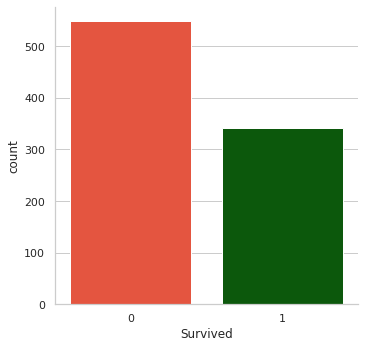

In [ ]:
sns.factorplot(x='Survived',data=df,kind='count',palette=['#ff4125','#006400'],size=5,aspect=1)

In [ ]:
# consider 'Sex' feature.
df[df.Survived==1].groupby('Sex').Survived.count()
pd.crosstab(index=[df.Sex],columns=[df.Survived],margins=True) # set normalize=True to view %.

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


233 female survived while only 109 males. This clearly shows that more females survived than males did. the following graph clearly shows the picture.

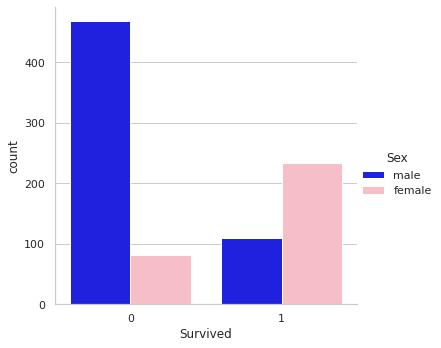

In [ ]:
sns.factorplot(x='Survived',data=df,hue='Sex',palette=['#0000ff','#FFB6C1'],kind='count',size=5,aspect=1)

In [ ]:
pd.crosstab(index=[df.Sex],columns=[df.Survived],margins=True,normalize='index')  

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908
All,0.616162,0.383838


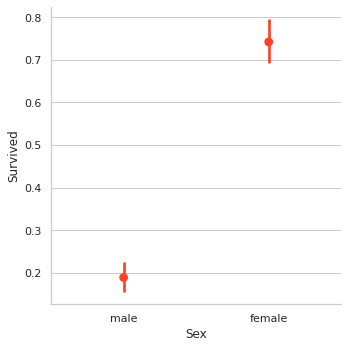

In [ ]:
sns.factorplot(x='Sex',y='Survived',kind='point',data=df,palette=['#ff4125'],size=5,aspect=1)

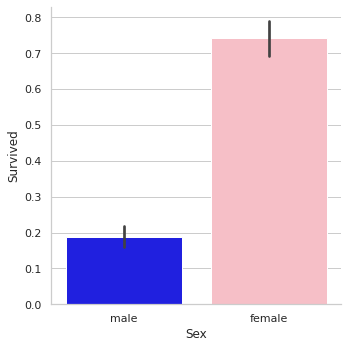

In [ ]:
sns.factorplot(x='Sex',y='Survived',data=df,kind='bar',palette=['#0000ff','#FFB6C1'],size=5,aspect=1)

# around 18% of all males survived whereas around 75% of females survived. This again shows that females survived in greater number.

In [ ]:
# consider 'Pclass' feature.
df[df.Survived==1].groupby('Pclass').Survived.count()
pd.crosstab(index=[df.Pclass],columns=[df.Survived],margins=True) # set normalize=index to view rowwise %.

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


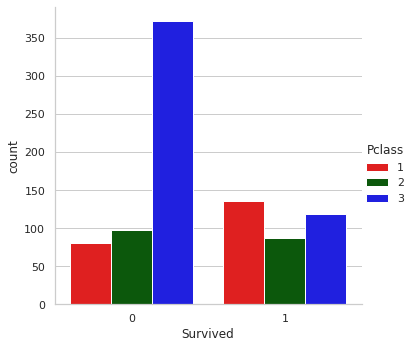

In [ ]:
sns.factorplot(x='Survived',y=None,hue='Pclass',kind='count',data=df,size=5,aspect=1,palette=['#ff0000','#006400','#0000ff'])

In [ ]:
# consider 'Pclass' feature.
df[df.Survived==1].groupby('Pclass').Survived.count()
pd.crosstab(index=[df.Pclass],columns=[df.Survived],margins=True,normalize=True) # set normalize=index to view rowwise %.

Survived,0,1,All
Pclass,,,
1,0.089787,0.152637,0.242424
2,0.108866,0.097643,0.206510
3,0.417508,0.133558,0.551066
All,0.616162,0.383838,1.000000


this again shows that 38% of people survived that accident. also this highlights that only 9% of total passengers who traveled in Pclass 2 survived and rest died and similarly 15% of passengers in Pclass 1 survived and rest died.

In [ ]:
pd.crosstab(index=[df.Pclass],columns=[df.Survived],margins=True,normalize='index') 

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363
All,0.616162,0.383838


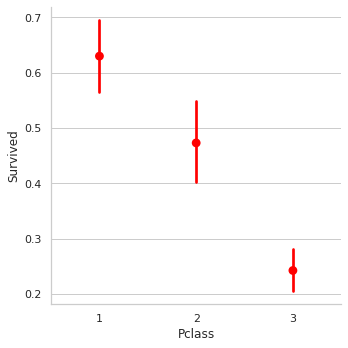

In [ ]:
sns.factorplot(x='Pclass',y='Survived',kind='point',data=df,size=5,aspect=1,palette=['#ff0000'])

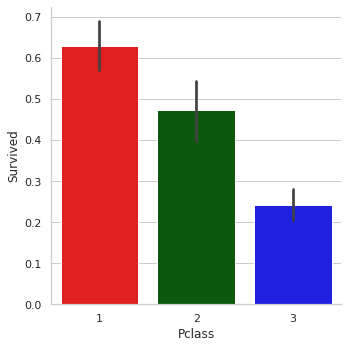

In [ ]:
sns.factorplot(x='Pclass',y='Survived',data=df,kind='bar',palette=['#ff0000','#006400','#0000ff'],size=5,aspect=1)

###### now this shows an even better picture. 75 % of people died in class 3 and only 24% survived. similarly for class 2.for class 1 only 37% died and rest survived probably bcoz of better facilities.in a nutshell most of the people in pclass 1 survived and most of the people in plass 3 died.

In [ ]:
# grouping by both male or female and the respective Pclasses
pd.crosstab(index=[df.Sex,df.Pclass],columns=[df.Survived],margins=True) 
# the result clearly shows that most of the male in class 2 and 3 died and most of the females in class 1 and 2 survived.
# see the tabulation below.

Survived         0    1  All
Sex    Pclass               
female 1         3   91   94
       2         6   70   76
       3        72   72  144
male   1        77   45  122
       2        91   17  108
       3       300   47  347
All            549  342  891

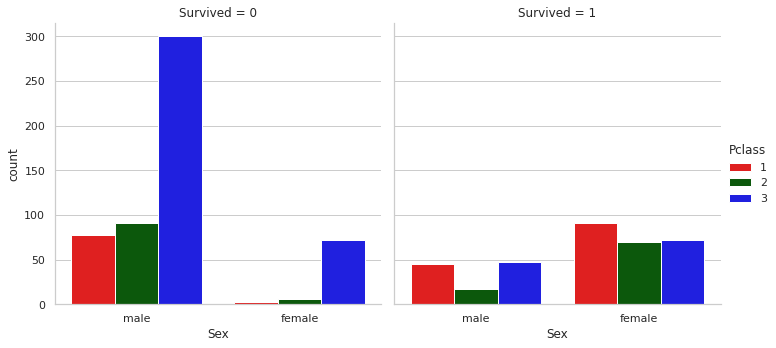

In [ ]:
sns.factorplot(x='Sex',hue='Pclass',data=df,col='Survived',kind='count',palette=['#ff0000','#006400','#0000ff'],size=5,aspect=1)

the graph clearly shows that majority of the males embarked with S died . also very few females died who were embarked C or Q.

In [ ]:
pd.crosstab(index=[df.Pclass,df.Embarked],columns=[df.Survived],margins=True)

Survived           0    1  All
Pclass Embarked               
1      C          26   59   85
       Q           1    1    2
       S          53   74  127
2      C           8    9   17
       Q           1    2    3
       S          88   76  164
3      C          41   25   66
       Q          45   27   72
       S         286   67  353
All              549  340  889

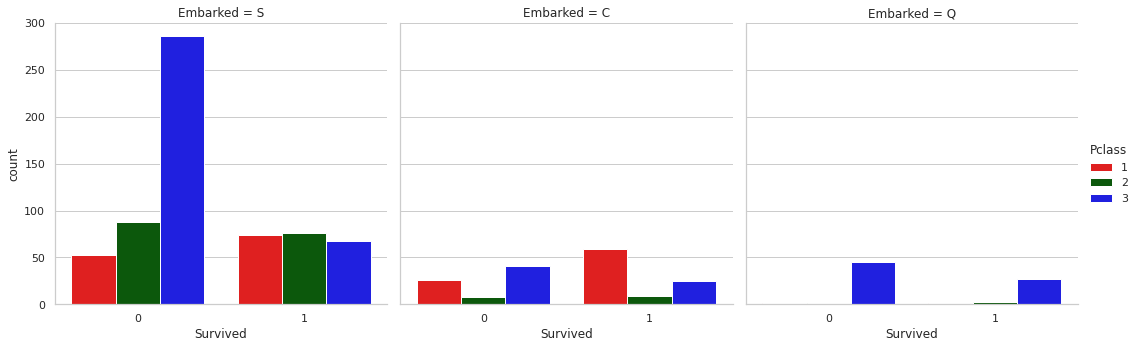

In [ ]:
sns.factorplot(x='Survived',col='Embarked',data=df,hue='Pclass',kind='count',palette=['#ff0000','#006400','#0000ff'],size=5,aspect=1)

In [ ]:
# now we need to convert categorical variables into numerical for modelling.
 # can use labels or sep col using get_dummies()

#sex
for frame in [train,test,df,test_df]:
    frame.loc[frame.Sex=='male','Sex']=0
    frame.loc[frame.Sex=='female','Sex']=1
    
#embarked    
for frame in [train,test,df,test_df]:
    frame.loc[frame.Embarked=='C','Embarked']=0
    frame.loc[frame.Embarked=='S','Embarked']=1
    frame.loc[frame.Embarked=='Q','Embarked']=2
#df.head(10)
        

In [ ]:
#now age and fare are continuous variables.
#we can convert them to discrete intervals.

#age
df.Age.describe()   # age varies from 0.42 to 80.00
for frame in [train,test,df,test_df]:
    frame['bin_age']=np.nan
    frame['bin_age']=np.floor(frame['Age'])//10
    frame['bin_fare']=np.nan
    frame['bin_fare']=np.floor(frame['Fare'])//50
    
df.head(10)[['Fare','bin_fare','Age','bin_age']] 
# df.bin_age.unique()
# df.bin_fare.unique()
 

,Fare,bin_fare,Age,bin_age
0,7.2500,0.0,22.0,2.0
1,71.2833,1.0,38.0,3.0
2,7.9250,0.0,26.0,2.0
3,53.1000,1.0,35.0,3.0
4,8.0500,0.0,35.0,3.0
5,8.4583,0.0,NaN,NaN
6,51.8625,1.0,54.0,5.0
7,21.0750,0.0,2.0,0.0
8,11.1333,0.0,27.0,2.0
9,30.0708,0.0,14.0,1.0


In [ ]:
#can drop Age and Fare columns
for frame in [train,df,test_df,test]:
    frame.drop(['Age','Fare'],axis=1,inplace=True)
# df.head()
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,bin_age,bin_fare
0,892,3,"Kelly, Mr. James",0,0,0,330911,NaN,2,3.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1,0,363272,NaN,1,4.0,0.0
2,894,2,"Myles, Mr. Thomas Francis",0,0,0,240276,NaN,2,6.0,0.0
3,895,3,"Wirz, Mr. Albert",0,0,0,315154,NaN,1,2.0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,3101298,NaN,1,2.0,0.0


In [ ]:
#now we can see how survival varies with bin_age and bin_fare.
df.groupby('bin_age').Survived.count()
pd.crosstab(index=[df.bin_age],columns=[df.Survived],margins=True)
pd.crosstab(index=[df.Sex,df.Survived],columns=[df.bin_age,df.Pclass],margins=True)

bin_age      0.0         1.0         2.0      ... 6.0       7.0       8.0  All
Pclass         1   2   3   1   2   3   1   2  ...   1  2  3   1  2  3   1     
Sex Survived                                  ...                             
0   0          0   0  13   3   9  38   9  28  ...   9  2  2   3  1  2   0  360
    1          2   9   8   2   1   4   9   0  ...   1  1  0   0  0  0   1   93
1   0          1   0  10   0   0  11   1   3  ...   0  0  0   0  0  0   0   64
    1          0   8  11  13   8  13  15  22  ...   3  0  1   0  0  0   0  197
All            3  17  42  18  18  66  34  53  ...  13  3  3   3  1  2   1  714

[5 rows x 26 columns]

all the males and females in Pclass 2 and first bin_age survived the accident which hints that children were given preference. also note that in Pclass 1 and bin_age 2,3,4 almost all the people survived which again shows that people in Pclass 1 had better facilities.


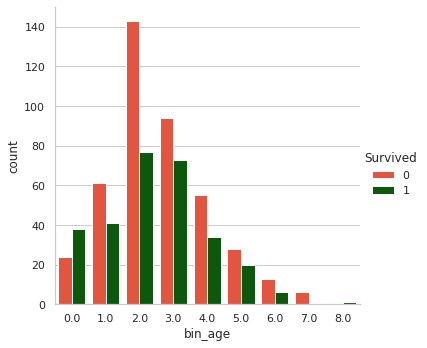

In [ ]:
sns.factorplot(x='bin_age',hue='Survived',kind='count',data=df,palette=['#ff4125','#006400'],size=5,aspect=1)

In [ ]:
#similarly for bin_fare
df.groupby('bin_fare').Survived.count()
pd.crosstab(index=[df.bin_fare],columns=[df.Survived],margins=True)
pd.crosstab(index=[df.Sex,df.Survived],columns=[df.bin_fare,df.Pclass],margins=True)

bin_fare     0.0           1.0        2.0 3.0 4.0 5.0 10.0  All
Pclass         1    2    3   1  2   3   1   1   1   1    1     
Sex Survived                                                   
0   0         41   86  294  24  5   6   5   1   4   2    0  468
    1         23   17   42  15  0   5   4   1   0   0    2  109
1   0          1    6   69   0  0   3   0   2   0   0    0   81
    1         11   68   72  48  2   0  15   5   7   4    1  233
All           76  177  477  87  7  14  24   9  11   6    3  891

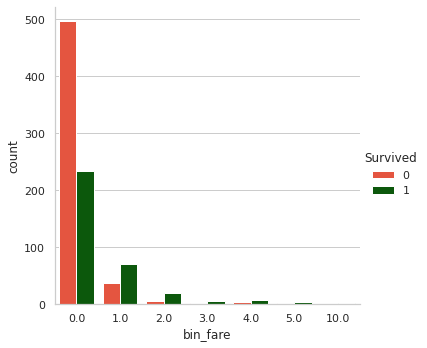

In [ ]:
sns.factorplot(x='bin_fare',hue='Survived',kind='count',data=df,palette=['#ff4125','#006400'],size=5,aspect=1)

In [ ]:
df.info()
# embarked and bin_age still have null values.
df.describe(include=[np.number])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
 10  bin_age      714 non-null    float64
 11  bin_fare     891 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,SibSp,Parch,bin_age,bin_fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,2.525210,0.322110
std,257.353842,0.486592,0.836071,1.102743,0.806057,1.497097,0.959022
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,0.000000,2.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,0.000000,3.000000,0.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,8.000000,10.000000




now both of these columns have some missing values and so we need to fill the missing values. for now we impute with the median.

In [ ]:
for frame in [test,train,df,test_df]:
    frame.bin_age.fillna(frame.bin_age.median(),inplace=True)
    frame.Embarked.fillna(frame.Embarked.median(),inplace=True)
    frame.bin_fare.fillna(frame.bin_fare.median(),inplace=True)
# just to check 
df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Cabin        204 non-null    object 
 9   Embarked     891 non-null    float64
 10  bin_age      891 non-null    float64
 11  bin_fare     891 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB


data exploration, cleaning and preprocessing ends. Now can move onto modelling algorithms.


In [ ]:
for frame in [train,df,test]:
    frame.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
for frame in [test_df]:
    frame.drop(['-Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
#df.head()


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df.Survived,test_size=0.30,random_state=42)

In [ ]:
array = df.values
X = array[:,6:11]
Y = array[:,12]
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.30, random_state=7)

In [ ]:
models=[LogisticRegression(),RandomForestClassifier(),
        DecisionTreeClassifier()]
model_names=['LogisticRegression','RandomForestClassifier','DecisionTree']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

{'Accuracy': [0.8022388059701493, 0.7947761194029851, 0.7910447761194029],
 'Modelling Algo': ['LogisticRegression',
  'RandomForestClassifier',
  'DecisionTree']}

In [ ]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.802239
1,RandomForestClassifier,0.794776
2,DecisionTree,0.791045


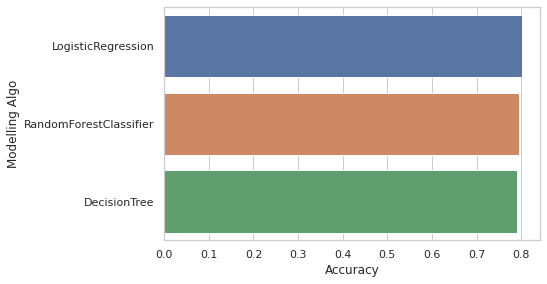

In [ ]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df.Survived,test_size=0.10,random_state=42)

In [ ]:
array = df.values
X = array[:,6:11]
Y = array[:,12]
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.10, random_state=7)

In [ ]:
models=[LogisticRegression(),RandomForestClassifier(),
        DecisionTreeClassifier()]
model_names=['LogisticRegression','RandomForestClassifier','DecisionTree']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

{'Accuracy': [0.8444444444444444, 0.8111111111111111, 0.8222222222222222],
 'Modelling Algo': ['LogisticRegression',
  'RandomForestClassifier',
  'DecisionTree']}

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df.Survived,test_size=0.40,random_state=42)

In [ ]:
array = df.values
X = array[:,6:11]
Y = array[:,12]
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.40, random_state=7)

In [ ]:
models=[LogisticRegression(),RandomForestClassifier(),
        DecisionTreeClassifier()]
model_names=['LogisticRegression','RandomForestClassifier','DecisionTree']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

{'Accuracy': [0.7927170868347339, 0.7843137254901961, 0.7983193277310925],
 'Modelling Algo': ['LogisticRegression',
  'RandomForestClassifier',
  'DecisionTree']}

In [ ]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.792717
1,RandomForestClassifier,0.784314
2,DecisionTree,0.798319


Model 1

In [ ]:
no_of_test=[]
for i in range(0,101,10):
     if(i!=0):
        no_of_test.append(i)
no_of_test
params_dict={'n_estimators':no_of_test}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params_dict,scoring='accuracy')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print(accuracy_score(pred,y_test))

0.7927170868347339


In [ ]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy')
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
print(accuracy_score(pred,y_test))

0.773109243697479


Model 2

In [ ]:
no_of_test=[]
for i in range(0,101,30):
     if(i!=0):
        no_of_test.append(i)
no_of_test
params_dict={'n_estimators':no_of_test}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params_dict,scoring='accuracy')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print(accuracy_score(pred,y_test))

0.7899159663865546


In [ ]:
params_dict={'C':[0.01, 0.1, 0.1, 1, 30, 100, 100],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy')
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
print(accuracy_score(pred,y_test))

0.773109243697479


Model 3

In [ ]:
no_of_test=[]
for i in range(0,101,40):
     if(i!=0):
        no_of_test.append(i)
no_of_test
params_dict={'n_estimators':no_of_test}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params_dict,scoring='accuracy')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print(accuracy_score(pred,y_test))

0.7955182072829131


In [ ]:
params_dict={'C':[0.01, 0.1, 0.1, 1, 40, 100, 100],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy')
clf_lr.fit(x_train,y_train)
pred=clf_lr.predict(x_test)
print(accuracy_score(pred,y_test))

0.773109243697479


In [ ]:
pred=clf_lr.predict(test)
#pred
dict={'PassengerId':test_df['PassengerId'],'Survived':pred}
ans=pd.DataFrame(dict)
ans.to_csv('answer.csv',index=False)